# Session 5 - Advanced Data Visualization
## Data Visualization with Plotly

In [39]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 1. Import Data

In [40]:
df = pd.read_csv("data_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Plotly Visualization

List of plots from Plotly Express (px) that can be used:

| Plot Types | Plot Types | Plot Types | Plot Types |
| -- | -- | -- | -- |
| px.area() |  px.funnel() | px.parallel_categories() | px.sunburst() | 
| px.bar() | px.funnel_area() | px.pie() | px.timeline() | px.treemap() | 
| px.bar_polar() | px.get_trendline_results() | px.scatter() | px.violin() | 
| px.box() |px.histogram() | px.scatter_3d() | px.scatter_geo() | 
| px.choropleth() | px.line() | px.scatter_mapbox() | 
| px.choropleth_mapbox() | px.line_3d() | px.scatter_matrix() | 
| px.density_contour() | px.line_mapbox() |  px.scatter_polar() | 
| px.density_heatmap() | px.line_polar() | px.scatter_ternary() | 
| px.density_mapbox() | px.line_ternary() | px.strip() | 

### A. Pie Chart

In [41]:
# Create grouped survival data
df_survival = df.groupby(["Survived"]).count()["PassengerId"].reset_index()
df_survival["Survived"] = df_survival["Survived"].map(lambda x: "Yes" if x == 1 else "No")
df_survival

,Survived,PassengerId
0,No,549
1,Yes,342


In [42]:
# Create grouped gender data
df_gender = df.groupby(["Sex"]).count()["PassengerId"].reset_index()
df_gender

,Sex,PassengerId
0,female,314
1,male,577


In [43]:
# Plotly Express
fig = px.pie(df_survival,
             names = "Survived", 
             values= "PassengerId",
             title = "Percentage of Passenger Survival")
fig.show()

In [44]:
# Graphic Objects Plotly (Simple)
# Create subplot with 1 row and 2 columns
# in matplotlib, this is similar with plt.subplots(1, 2)
fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

# Create first pie plot about survival data in coords (1,1)
fig.add_trace(go.Pie(labels = df_survival["Survived"], 
                     values = df_survival["PassengerId"], 
                     title  = "Percentage of Passenger Survival",
                     name   = "Survive?",
                     marker = {'colors': ["Red","LightSkyBlue"]}),
              1, 1)

# Create second pie plot about gender data in coords (1,2)
fig.add_trace(go.Pie(labels = df_gender["Sex"], 
                     values = df_gender["PassengerId"], 
                     title  = "Percentage Gender of Passenger",
                     name   = "Gender",
                     marker = {'colors': ["Pink","Green"]}),
              1, 2)
fig.show()

In [45]:
# Graphic Objects Plotly (Advanced)
# Create subplot with 1 row and 2 columns
# in matplotlib, this is similar with plt.subplots(1, 2)
fig = go.Figure()

# Create first pie plot about survival data in coords (1,1)
fig.add_trace(go.Pie(labels = df_survival["Survived"], 
                     values = df_survival["PassengerId"], 
                     name  = "Survive?",
                     marker= {'colors': ["Red","LightSkyBlue"]}),
              )

# ==============================================================
# Lets make up our pie chart, harnessing the go shapes and texts
# ==============================================================

# 1. Add hole in the center
fig.update_traces(hole=0.7, hoverinfo="label+percent+name")

# 2. Add 5 text based on certain coordinates
fig.update_layout(
    title_text="Number of Passenger based on Survival Status",
    showlegend=False,
    annotations=[dict(text="Total Passenger", x=0.17+0.33, y=0.65, font_size=15, showarrow=False),
                 dict(text=str(df_survival["PassengerId"].sum()), x=0.190+0.31, y=0.55, font_size=40, showarrow=False),
                 dict(text="Y", x=0.481, y=0.425, font_size=15, showarrow=False),
                 dict(text="N", x=0.481+0.06, y=0.425, font_size=15, showarrow=False),
                ])

# 3. Add two additional boxes
## First Box (Blue Color)
fig.add_shape(type="rect",
    x0=0.1+0.35,
    y0=0.40, 
    x1=0.2+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="LightSkyBlue",
)

## Second Box (Red Color)
fig.add_shape(type="rect",
    x0=0.18+0.06+0.27, 
    y0=0.40, 
    x1=0.2+0.06+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="Red",
)

# Show the result
fig.show()

**Notes**

> About the coordinates of X and Y, there is no exact formula to determine x0 and y0 in the graphic objects. Its just a simple trial and error to determine the value itself. If it doens't fit in your graph, so you can change the number manually until it is becoming tidy.

### B. Barchart

In [46]:
df_class = df.groupby(["Pclass"])["PassengerId"].count().reset_index()
df_class

,Pclass,PassengerId
0,1,216
1,2,184
2,3,491


In [47]:
# Plotly Express
fig = px.bar(df_class,
             x = "Pclass", 
             y= "PassengerId",
             title = "Percentage of Passenger Survival")
fig.show()

In [48]:
# Graphic Objects Plotly (Simple)
# Create subplot with 1 row and 2 columns
# in matplotlib, this is similar with plt.subplots(1, 2)
fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'bar'}, {'type':'bar'}]])

# Create male and female data
df_class_male = df.query("""Sex == 'male'""").groupby(["Pclass"])["PassengerId"].count().reset_index()
df_class_female = df.query("""Sex != 'male'""").groupby(["Pclass"])["PassengerId"].count().reset_index()


# Create first pie plot about survival data in coords (1,1)
fig.add_trace(go.Bar(x = df_class_male["Pclass"], 
                     y = df_class_male["PassengerId"],
                     orientation='v',
                     name="Male",
                     hoverinfo="all"),
              1, 1)

# Create second pie plot about gender data in coords (1,2)
fig.add_trace(go.Bar(x = df_class_female["Pclass"], 
                     y = df_class_female["PassengerId"],
                     orientation='v',
                     name="Female",
                     hoverinfo="all"),
              1, 2)
fig.show()

In [49]:
# Graphic Objects Plotly (Stacked Bar Chart)
fig = go.Figure()
# Create first pie plot about survival data in coords
fig.add_trace(go.Bar(y = df_class_male["Pclass"], 
                     x = df_class_male["PassengerId"],
                     orientation='h',
                     name="Male",
                     hoverinfo="all"),)

# Create second pie plot about gender data in coords
fig.add_trace(go.Bar(y = df_class_female["Pclass"], 
                     x = df_class_female["PassengerId"],
                     orientation='h',
                     name="Female",
                     hoverinfo="all"),)
# Add barmode = stack
fig.update_layout(barmode='stack')
fig.show()

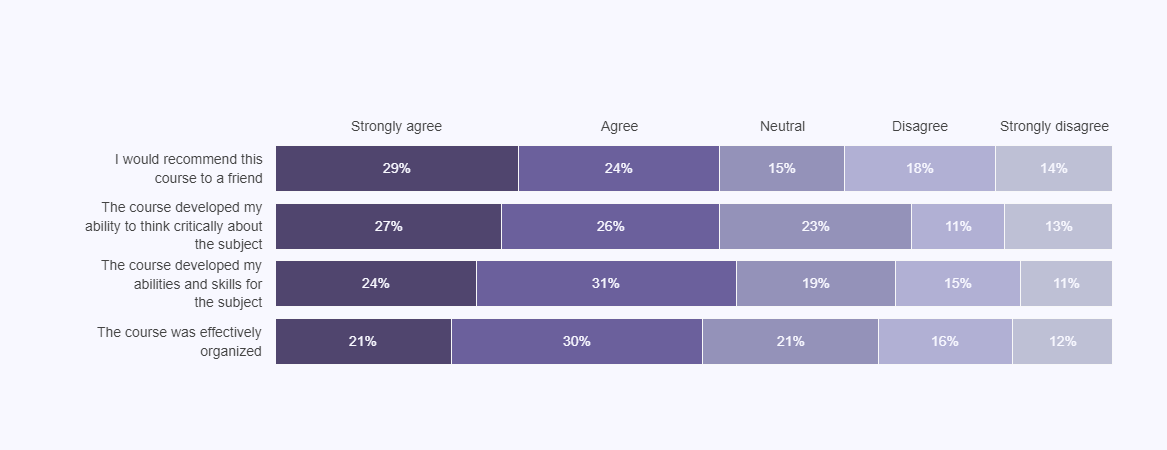

In [12]:
# Graphic Objects Plotly (Advanced Barchart)

# Create text label
top_labels = ['Strongly agree', 'Agree', 'Neutral', 'Disagree',
              'Strongly disagree']
# Define labels
colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

# Create matrix for survey data (The sum of each vector must be 100 (Percentage))
x_data = [[21, 30, 21, 16, 12],
          [24, 31, 19, 15, 11],
          [27, 26, 23, 11, 13],
          [29, 24, 15, 18, 14]]

# Define y label axis
y_data = ['The course was effectively<br>organized',
          'The course developed my<br>abilities and skills ' +
          'for<br>the subject', 'The course developed ' +
          'my<br>ability to think critically about<br>the subject',
          'I would recommend this<br>course to a friend']

fig = go.Figure()

# Create base Barplot for each vector
for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))
        
# Add update layout to beautify the visualization
fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

# Add label text
annotations = []
for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()

**Notes**

> It is a full iterative session, such drawing a empty canvas. First you make one picture, then you add some properties, then you tune up the colors, and so on and so forth. At the end, you will get the beaufitul visualization that is built by python - plotly. 

### C. Demographic Bar Plot

In [13]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

There are so many noises in the data, and 88 unique values. Its better to make age groups, so the visualization will be more tidy.

In [14]:
# We create age group based on the desired distances
df["age_group"] = df["Age"].map(lambda x: "0 - 10"  if 0<=x<=10 else\
                                          "11 - 20" if 11<=x<=20 else\
                                          "21 - 30" if 21<=x<=30 else\
                                          "31 - 40" if 31<=x<=40 else\
                                          "41 - 50" if 41<=x<=50 else\
                                          ">=51")
# Store the group name into a list
age_group_list = ["0 - 10", "11 - 20", "21 - 30", "31 - 40", "41 - 50", ">=51"]
# Let see the distribution
df.groupby(["age_group"])["PassengerId"].count()

age_group
0 - 10      64
11 - 20    115
21 - 30    229
31 - 40    153
41 - 50     84
>=51       246
Name: PassengerId, dtype: int64

In [15]:
# Then we create another group by using Gender
df_demographic = df.groupby(["Sex","age_group"])["PassengerId"].count().reset_index()
df_demographic = df_demographic.sort_values(["Sex","age_group"],ascending=[False,False]).reset_index(drop=True)
df_demographic

,Sex,age_group,PassengerId
0,male,>=51,175
1,male,41 - 50,53
2,male,31 - 40,99
3,male,21 - 30,148
4,male,11 - 20,69
5,male,0 - 10,33
6,female,>=51,71
7,female,41 - 50,31
8,female,31 - 40,54
9,female,21 - 30,81


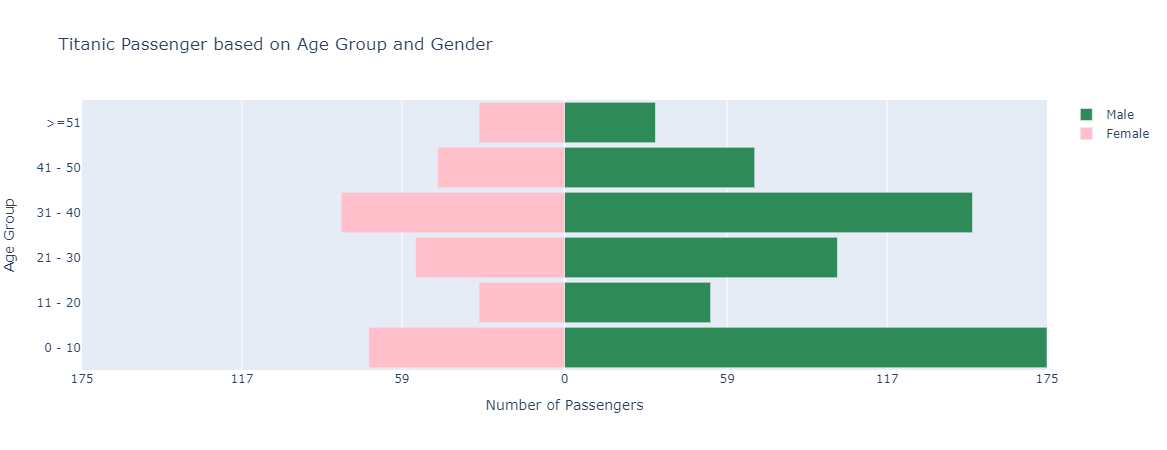

In [16]:
# Now lets make the demographic plot
# Demographic plot is basically a stacked bar chart, however the middle point is 0 (value)
# The strategy is: Create 2 bar charts,the first 1 must be negative, the second one positive in the same axis (y)

# 1. Separate female and female data in order to extract their passenger number by age groups
df_demographic_female = df_demographic.query("Sex!='male'").set_index(["age_group"])
df_demographic_male = df_demographic.query("Sex=='male'").set_index(["age_group"])

# 2a. Extract female passenger Id Data, then make it negative (-1), since we want to show the female color in left side
female_bins = np.array(df_demographic_female["PassengerId"].tolist())*-1
# 2b. While the male passenger is positive number
men_bins = np.array(df_demographic_male["PassengerId"].astype(int).tolist())

# 3. Store the maximum value, and the distance range in plot
max_value = df_demographic["PassengerId"].max()
jump = round(df_demographic["PassengerId"].max()/3)

# 4. Create the layout
layout = go.Layout(yaxis=go.layout.YAxis(title='Age Group',
                                         ticktext=df_demographic["age_group"].unique()
                                        ),
                   xaxis=go.layout.XAxis(
                           range   = [-max_value, max_value],
                           tickvals=[-max_value, -max_value+jump, -max_value+jump*2, 0 , max_value-jump*2, max_value-jump, max_value],
                           ticktext=[max_value,   max_value-jump, max_value-jump*2 , 0 , max_value-jump*2,  max_value-jump, max_value],
                           title='Number of Passengers'),
                   barmode='overlay',
                   bargap=0.1,
                   title="Titanic Passenger based on Age Group and Gender")

# 5. Create the figure
fig = go.Figure(layout=layout)

# 6a. Create barplot for Male
fig.add_trace(go.Bar(  y = age_group_list,
                       x = men_bins,
                       orientation='h',
                       name='Male',
                       hoverinfo='x',
                       marker=dict(color='seagreen')
                       ))
# 6b. Create barplot for Female
fig.add_trace(go.Bar(  y = age_group_list,
                       x = female_bins,
                       orientation='h',
                       name='Female',
                       text=1 * female_bins.astype('int'),
                       hoverinfo='x',
                       marker=dict(color='pink')
                       ))
# 7. Show the result
fig.show()

## D. Waterfall Plot

Waterfall plot describes about the overtime progress of one variable, storytell when it goes down and goes up in a specific time. Plotly has a waterfall plot, so we don't have to make it from scracht (formulizing bar plot).  

In [17]:
df_waterfall = pd.read_csv("session_5_vis_plotly_waterfall.csv")
df_waterfall

,hiring_year,resign_year,total_hired,total_resign,total_people,changes
0,2006,0,1.0,0.0,1.0,1.0
1,2007,0,2.0,0.0,3.0,2.0
2,2008,0,2.0,0.0,5.0,2.0
3,2009,0,7.0,0.0,12.0,7.0
4,2010,0,8.0,0.0,20.0,8.0
5,2011,0,76.0,0.0,96.0,76.0
6,2012,2012,41.0,1.0,136.0,40.0
7,2013,2013,43.0,3.0,177.0,40.0
8,2014,2014,56.0,6.0,230.0,50.0
9,2015,2015,31.0,13.0,254.0,18.0


This data tells about the change of employment number year by year, so we would like to visualize the "change" itself. 

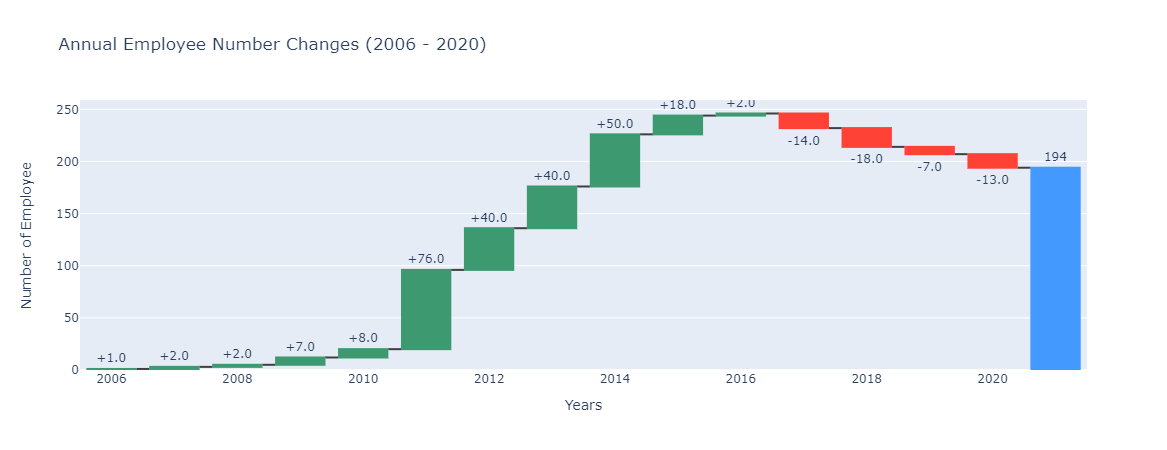

In [18]:
# 1. Create the layout
layout = go.Layout(
    title= "Annual Employee Number Changes (2006 - 2020)",
    showlegend=False,
    yaxis=dict(title='Number of Employee'),
    xaxis=dict(title='Years')
    
)

# 2. Calculate the latest number of employee
all_employees = int(df_waterfall["total_hired"].sum()-df_waterfall["total_resign"].sum())

# 3. Create the waterfall plot
## For variable 'measure', relative stands for changes of the data (red/green barplot), while total stands for the last data (blue barplot)
fig = go.Figure(go.Waterfall(
    name = "Employee Number", 
    orientation = "v",
    textposition = "outside",
    measure = ["relative" for x in range(len(df_waterfall["changes"]))]+["total"],
    x = df_waterfall["hiring_year"].tolist()+["2021"], 
    y = df_waterfall["changes"].tolist()+[str(all_employees)],
    text = [str(x) if x <=0 else "+"+str(x) for x in df_waterfall["changes"]]+[str(all_employees)],
    connector = {"line":{"color":"rgb(63, 63, 63)", "dash":"solid"}},
    ), 
    layout= layout
)

fig.show()

## E. TreeMap Plot

Tree Map Plot describes a funnel analysis visually, to determine a preliminary assumption from quantitative and qualitative data. 

In [19]:
df_treemap = df.groupby(["Survived","Sex","Pclass"]).agg({"PassengerId":len,"Fare":np.mean}).reset_index()
df_treemap["Survived"] = df_treemap["Survived"].map(lambda x: "Yes" if x == 1 else "No")
df_treemap

,Survived,Sex,Pclass,PassengerId,Fare
0,No,female,1,3,110.604167
1,No,female,2,6,18.250000
2,No,female,3,72,19.773093
3,No,male,1,77,62.894910
4,No,male,2,91,19.488965
5,No,male,3,300,12.204469
6,Yes,female,1,91,105.978159
7,Yes,female,2,70,22.288989
8,Yes,female,3,72,12.464526
9,Yes,male,1,45,74.637320


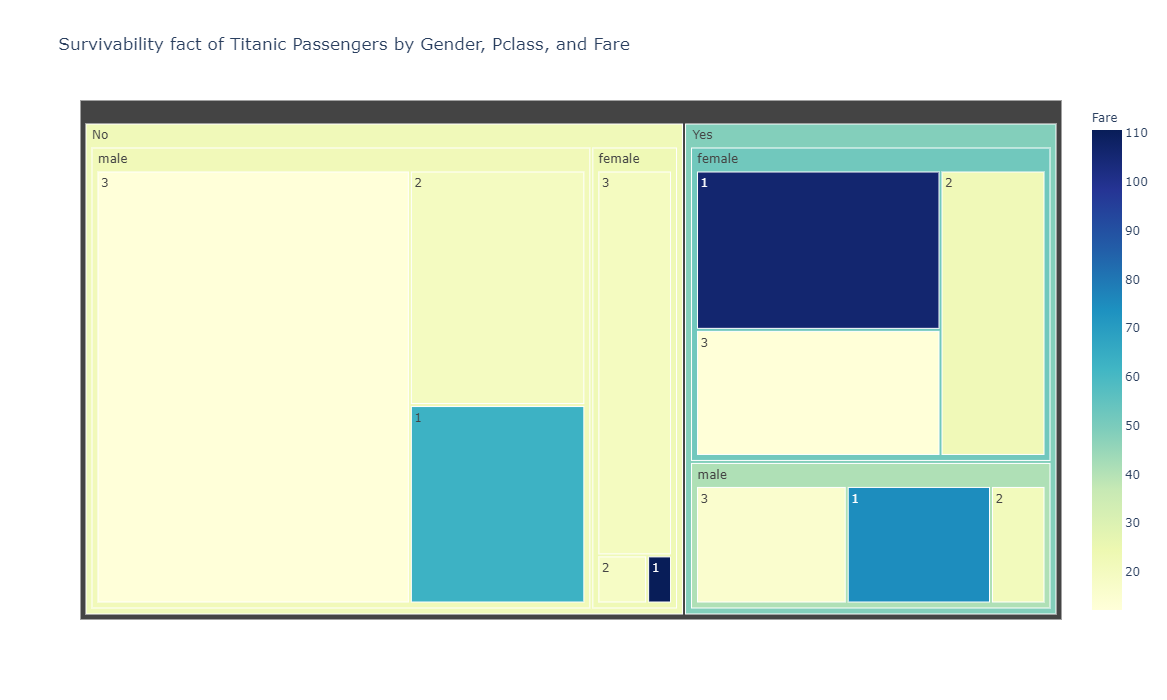

In [20]:
# Treemap using Plotly Express
fig = px.treemap(df_treemap,
                 path=["Survived","Sex","Pclass"], 
                 values='PassengerId', 
                 color = "Fare",
                 color_continuous_scale='YlGnBu',width=1000,height=700,
                 title = "Survivability fact of Titanic Passengers by Gender, Pclass, and Fare"
                 )
fig.show()

## F. Sunburst Plot

Sunburst is definitely similar with TreeMap, yet with different visualization (pie-chart based). The function itself, is to describe funnel analysis for a specific action.

In [21]:
df_sunburst = px.data.tips()
df_sunburst.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


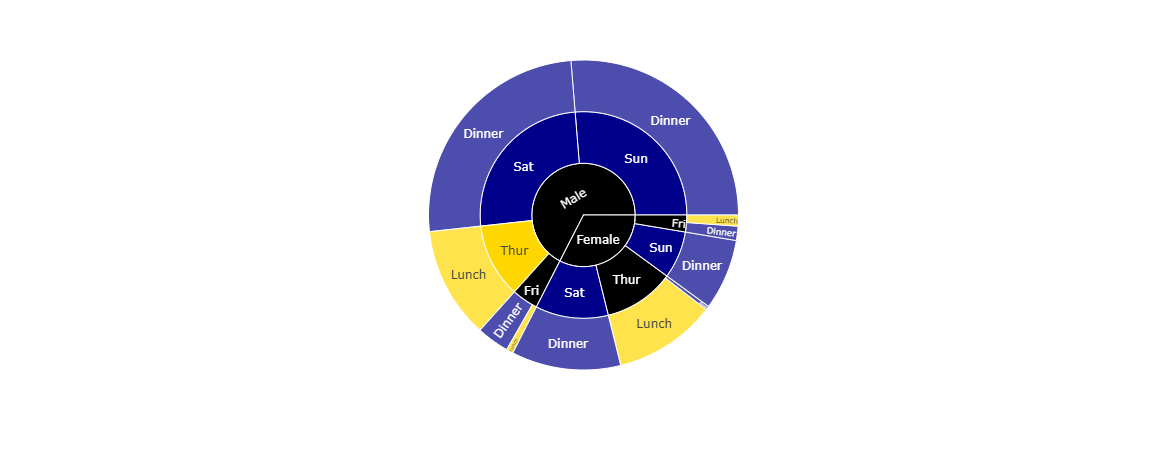

In [22]:
fig = px.sunburst(df_sunburst, 
                  path=['sex', 'day', 'time'], 
                  values='total_bill', 
                  color='time',
                  color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.show()

<center> You can try other beautiful plots:</center>

| Plot Types | Function | Url Link | 
| -- | -- | -- |
| Sankey Plot | Funnel Analysis | https://plotly.com/python/sankey-diagram/ | 
| Parallel Categories Diagram | Funnel Analysis | https://plotly.com/python/parallel-categories-diagram/ |
| Maps Related Plot | Geographic Analysis | https://plotly.com/python/maps/ |
| Statistics-related Plot | Statistical Analysis | https://plotly.com/python/statistical-charts/ |
| AI and Machine Learning-related Plot | ML Performance Visualization | https://plotly.com/python/ai-ml/ |
| Economic-related Plot | Time Series, Funnel, and Indicator Analysis | https://plotly.com/python/financial-charts/ |